<a href="https://colab.research.google.com/github/Sashaalex7/Python_hw/blob/master/Tretyakova_HW_MapReduce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [0]:
!wget -q www-us.apache.org/dist/spark/spark-2.4.3/spark-2.4.3-bin-hadoop2.7.tgz

In [3]:
!tar -xvf spark-2.4.3-bin-hadoop2.7.tgz

spark-2.4.3-bin-hadoop2.7/
spark-2.4.3-bin-hadoop2.7/python/
spark-2.4.3-bin-hadoop2.7/python/setup.cfg
spark-2.4.3-bin-hadoop2.7/python/pyspark/
spark-2.4.3-bin-hadoop2.7/python/pyspark/resultiterable.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/python/
spark-2.4.3-bin-hadoop2.7/python/pyspark/python/pyspark/
spark-2.4.3-bin-hadoop2.7/python/pyspark/python/pyspark/shell.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/heapq3.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/join.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/version.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/rdd.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/java_gateway.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/find_spark_home.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/_globals.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/worker.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/accumulators.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/mllib/
spark-2.4.3-bin-hadoop2.7/python/pyspark/mllib/feature.py
spark-2.4.3-bin-hadoop2.7/python/pyspark

In [0]:
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.3-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

In [0]:
iris = spark.read.csv('iris.csv', inferSchema=True, header=True)

In [8]:
iris.show()

+------------+-----------+------------+-----------+-------+
|sepal.length|sepal.width|petal.length|petal.width|variety|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|
|         5.4|        3.9|         1.7|        0.4| Setosa|
|         4.6|        3.4|         1.4|        0.3| Setosa|
|         5.0|        3.4|         1.5|        0.2| Setosa|
|         4.4|        2.9|         1.4|        0.2| Setosa|
|         4.9|        3.1|         1.5|        0.1| Setosa|
|         5.4|        3.7|         1.5|        0.2| Setosa|
|         4.8|        3.4|         1.6|        0.2| Setosa|
|         4.8|        3.0|         1.4|        0.1| Setosa|
|         4.3|        3.0|         1.1| 

In [62]:
iris.groupby('variety').count().show()

+----------+-----+
|   variety|count|
+----------+-----+
| Virginica|   50|
|    Setosa|   50|
|Versicolor|   50|
+----------+-----+



In [14]:
iris=iris.withColumnRenamed('sepal.length', 'sepal_length')
iris=iris.withColumnRenamed('sepal.width', 'sepal_width')
iris=iris.withColumnRenamed('petal.length', 'petal_length')
iris=iris.withColumnRenamed('petal.width', 'petal_width')
iris.show(1)


+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|variety|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| Setosa|
+------------+-----------+------------+-----------+-------+
only showing top 1 row



In [20]:
iris.groupby('variety').max('sepal_length','sepal_width','petal_length', 'petal_width').show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|max(sepal_length)|max(sepal_width)|max(petal_length)|max(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              7.9|             3.8|              6.9|             2.5|
|    Setosa|              5.8|             4.4|              1.9|             0.6|
|Versicolor|              7.0|             3.4|              5.1|             1.8|
+----------+-----------------+----------------+-----------------+----------------+



In [21]:
iris.groupby('variety').min('sepal_length','sepal_width','petal_length', 'petal_width').show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|min(sepal_length)|min(sepal_width)|min(petal_length)|min(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              4.9|             2.2|              4.5|             1.4|
|    Setosa|              4.3|             2.3|              1.0|             0.1|
|Versicolor|              4.9|             2.0|              3.0|             1.0|
+----------+-----------------+----------------+-----------------+----------------+



In [22]:
iris.groupby('variety').avg('sepal_length','sepal_width','petal_length', 'petal_width').show()

+----------+-----------------+------------------+------------------+------------------+
|   variety|avg(sepal_length)|  avg(sepal_width)| avg(petal_length)|  avg(petal_width)|
+----------+-----------------+------------------+------------------+------------------+
| Virginica|6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Setosa|5.005999999999999| 3.428000000000001|1.4620000000000002|0.2459999999999999|
|Versicolor|            5.936|2.7700000000000005|              4.26|1.3259999999999998|
+----------+-----------------+------------------+------------------+------------------+



In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
iris_g = iris.toPandas()

In [0]:
setosa=iris_g[iris_g['variety']=='Setosa']
versicolor =iris_g[iris_g['variety']=='Versicolor']
virginica =iris_g[iris_g['variety']=='Virginica']

<Figure size 432x288 with 0 Axes>

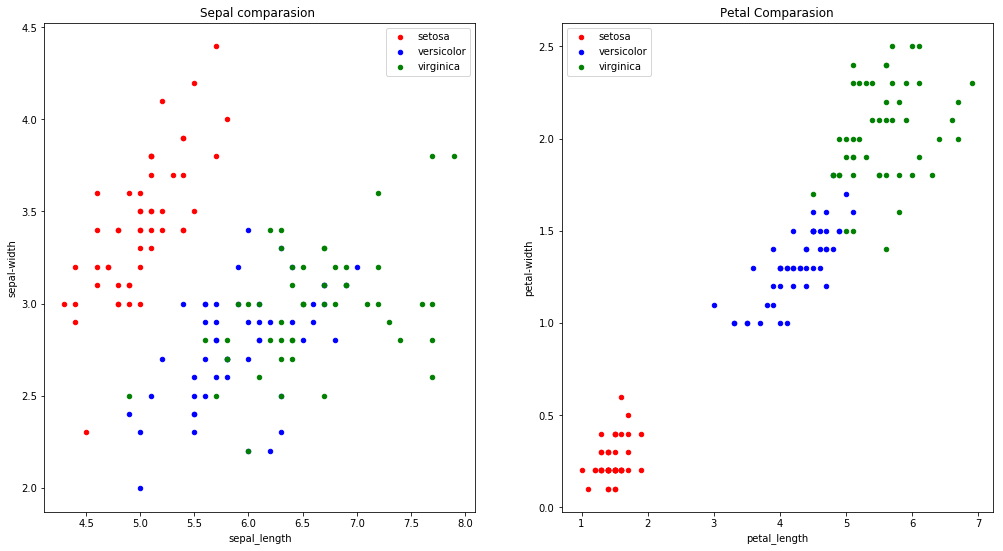

In [53]:
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(17, 9))
setosa.plot(x="sepal_length", y="sepal_width", kind="scatter",ax=ax[0],label='setosa',color='r')
versicolor.plot(x="sepal_length",y="sepal_width",kind="scatter",ax=ax[0],label='versicolor',color='b')
virginica.plot(x="sepal_length", y="sepal_width", kind="scatter", ax=ax[0], label='virginica', color='g')

setosa.plot(x="petal_length", y="petal_width", kind="scatter",ax=ax[1],label='setosa',color='r')
versicolor.plot(x="petal_length",y="petal_width",kind="scatter",ax=ax[1],label='versicolor',color='b')
virginica.plot(x="petal_length", y="petal_width", kind="scatter", ax=ax[1], label='virginica', color='g')
ax[0].set(title='Sepal comparasion ', ylabel='sepal-width')
ax[1].set(title='Petal Comparasion',  ylabel='petal-width')
plt.show()


In [0]:
#Если у цветка sepal_width>3,  а sepal_length<6, petal_length<2, а  petal_width<0.7, то это setosa

In [0]:
#Всего в датасете isir 50 цветков вида setosa, если я отфильтрую данные по всем 4 условиям,
#а потом сгруппирую по variety, то у меня должно получиться количество setosa близкое к 50, а астальных видов по минимуму

In [55]:
iris.show(5)


+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|variety|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|
+------------+-----------+------------+-----------+-------+
only showing top 5 rows



In [61]:
iris.where((iris['sepal_length'] > 3) & (iris['sepal_length']<6)  & (iris['petal_length']<2) &  (iris['petal_width']<0.7)).groupby('variety').count().show()

+-------+-----+
|variety|count|
+-------+-----+
| Setosa|   50|
+-------+-----+



In [0]:
#В итоге после фильтрации остались все 50 setosa